# Generating Knockoff Data

## Overview

This notebook serves as a demonstration on how to generate knockoff data using the knockoff package. Knockoff data is a technique to create a set of synthetic variables that mimic the statistical properties of the original variables, while preserving the same correlation structure.

In this notebook, we will walk through the process of generating knockoff data using the knockoff package.

In [20]:
import sys

sys.path.append('..')

from knockofforigins.knockoff_construct import choose_s_vector, generate_knockoff_features
from knockofforigins.data_gen import InfluentialFeatureGWASDataGenerator, GWASDataGenerator, SyntheticDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data_random_gen = SyntheticDataGenerator(n=100, p=10, noise_variance=1.0)
data_generator = InfluentialFeatureGWASDataGenerator(
    base_generator=data_random_gen, num_influential=2
)

# Generate the mock dataset
X, y = data_generator.generate_data()

display(pd.DataFrame(X).join(pd.DataFrame(y).head(), rsuffix='_Y', how='inner').head())

,0,1,2,3,4,5,6,7,8,9,0_Y
0,0,2,0,0,0,1,1,0,2,0,1
1,0,0,2,0,2,1,1,2,0,0,1
2,2,1,2,0,0,0,0,2,1,2,0
3,0,2,0,0,0,0,2,0,0,1,1
4,0,0,0,1,1,0,0,0,0,0,0


## EDA

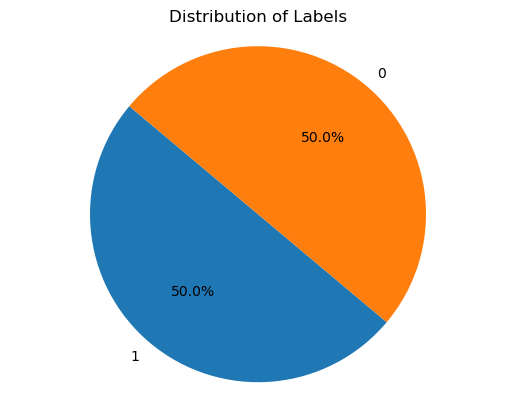

In [22]:
def plot_label_distribution_pie(y):
    label_counts = pd.Series(y).value_counts()
    plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
    plt.axis("equal") 
    plt.title("Distribution of Labels")
    plt.show()


# Example usage
plot_label_distribution_pie(y)

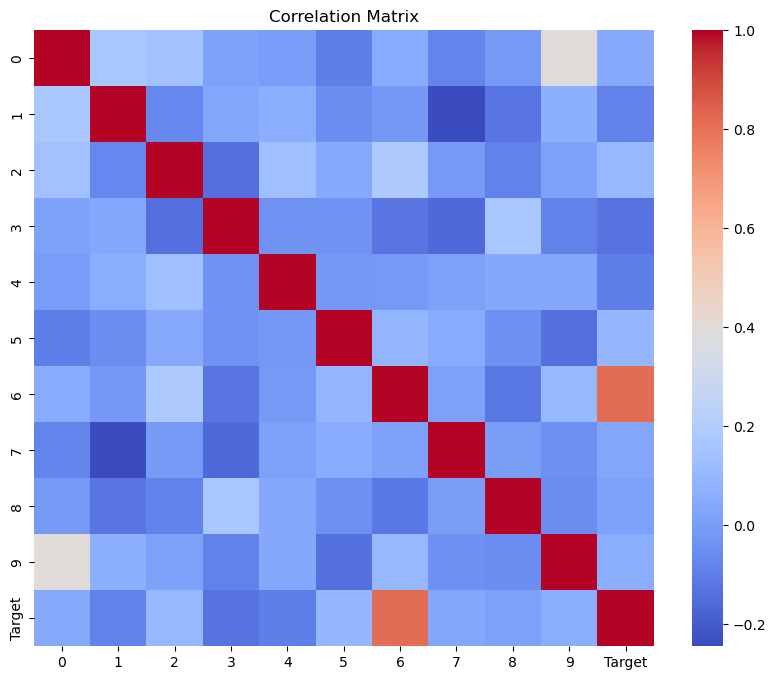

In [23]:
def plot_correlation_matrix(X, y):
    X_df = pd.DataFrame(X)
    y_df = pd.DataFrame(y, columns=["Target"])

    # Concatenate features and target for a full correlation matrix
    full_df = pd.concat([X_df, y_df], axis=1)
    corr_matrix = full_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()


plot_correlation_matrix(X, y)

## Constructing Knockoff Data

In [24]:
from knockofforigins import gram_matrix


X = gram_matrix.normalize_features(X)

gm = gram_matrix.compute_gram_matrix(X)

display(pd.DataFrame(gm))

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.479879,0.429587,0.362173,0.368421,0.330447,0.407232,0.296039,0.360598,0.604498
1,0.479879,1.000000,0.301900,0.392523,0.425553,0.376989,0.386028,0.212972,0.310172,0.403738
2,0.429587,0.301900,1.000000,0.235860,0.429587,0.389623,0.467624,0.317813,0.286274,0.333462
3,0.362173,0.392523,0.235860,1.000000,0.344064,0.359037,0.291666,0.240751,0.469689,0.284452
4,0.368421,0.425553,0.429587,0.344064,1.000000,0.391319,0.382299,0.367805,0.403526,0.382256
5,0.330447,0.376989,0.389623,0.359037,0.391319,1.000000,0.461378,0.409087,0.374499,0.290819
6,0.407232,0.386028,0.467624,0.291666,0.382299,0.461378,1.000000,0.373971,0.317241,0.429543
7,0.296039,0.212972,0.317813,0.240751,0.367805,0.409087,0.373971,1.000000,0.359996,0.309104
8,0.360598,0.310172,0.286274,0.469689,0.403526,0.374499,0.317241,0.359996,1.000000,0.321934
9,0.604498,0.403738,0.333462,0.284452,0.382256,0.290819,0.429543,0.309104,0.321934,1.000000


In [25]:
# Normalized X

display(pd.DataFrame(X))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.193347,0.00000,0.000000,0.000000,0.092848,0.088736,0.000000,0.18334,0.000000
1,0.000000,0.000000,0.19518,0.000000,0.187317,0.092848,0.088736,0.191565,0.00000,0.000000
2,0.187317,0.096674,0.19518,0.000000,0.000000,0.000000,0.000000,0.191565,0.09167,0.189832
3,0.000000,0.193347,0.00000,0.000000,0.000000,0.000000,0.177471,0.000000,0.00000,0.094916
4,0.000000,0.000000,0.00000,0.096674,0.093659,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.096674,0.00000,0.000000,0.093659,0.000000,0.177471,0.000000,0.00000,0.189832
96,0.093659,0.000000,0.00000,0.000000,0.000000,0.000000,0.088736,0.191565,0.00000,0.189832
97,0.093659,0.096674,0.00000,0.000000,0.000000,0.000000,0.000000,0.095783,0.09167,0.000000
98,0.000000,0.000000,0.19518,0.000000,0.000000,0.185695,0.177471,0.095783,0.00000,0.000000


In [26]:
s_vector = choose_s_vector(gm, tau=0.2)

assert np.all(np.diag(s_vector) <= 2.0 * gm)

s_vector

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [27]:
knockoff_X = generate_knockoff_features(X, s_vector, normalize=False)

display(pd.DataFrame(knockoff_X))

,0,1,2,3,4,5,6,7,8,9
0,-0.890544,0.510361,0.442975,-0.913683,-0.072029,0.432064,-0.052344,0.303464,0.447809,0.083002
1,0.719583,-0.855096,0.713738,-0.952073,-0.310649,0.698649,0.467661,0.847295,0.395821,-0.728888
2,-0.417999,0.149731,0.079080,1.076517,-0.103709,0.298224,1.202784,0.163985,-0.329350,-0.562371
3,0.360270,0.738000,0.400294,-0.468056,1.043781,-0.200074,0.812929,-0.314832,0.209478,0.272296
4,-0.192227,0.545578,-0.597555,-0.229275,-0.580632,-0.423557,0.883556,0.513337,0.952519,0.610392
...,...,...,...,...,...,...,...,...,...,...
95,0.622879,0.061537,-0.106188,-0.262023,0.391214,0.392577,0.002637,0.085874,-0.285025,0.708741
96,0.823369,-0.565018,0.483960,-0.162742,-0.580759,-0.926858,-0.481362,-0.501407,0.380492,0.628717
97,0.013984,-0.356084,0.620336,-0.181393,0.009156,-0.113934,-0.165918,0.714545,-0.383145,0.402545
98,-0.154972,-1.046442,0.465996,-0.205827,-1.019167,-0.279466,1.606524,-0.413057,0.679827,0.939351


## Analyzing The Preservation of Knockoff Data Characteristics 

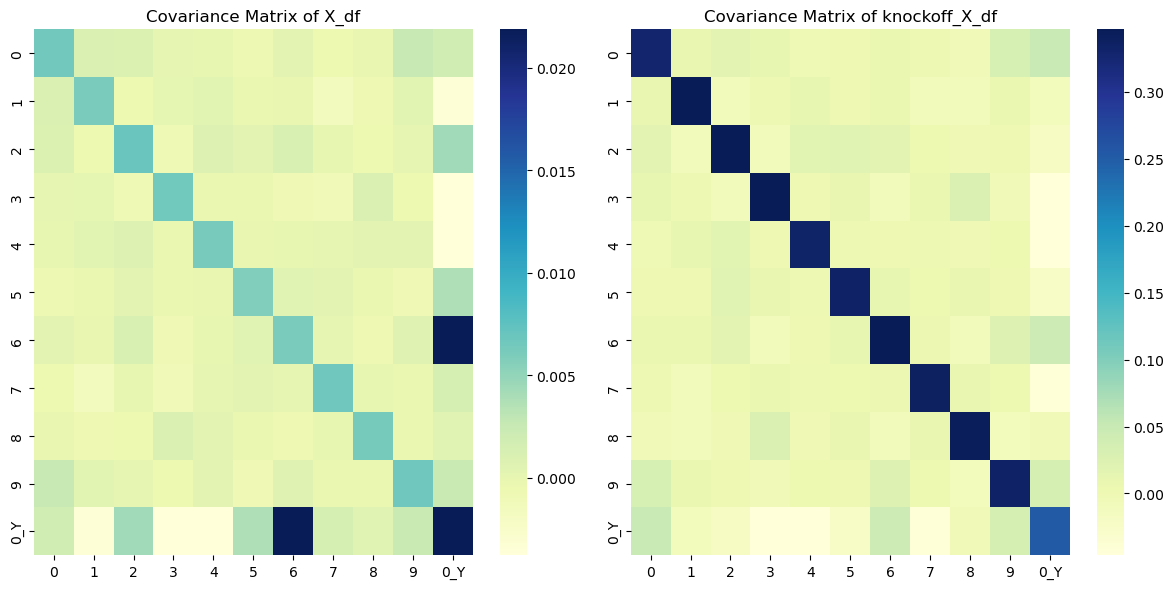

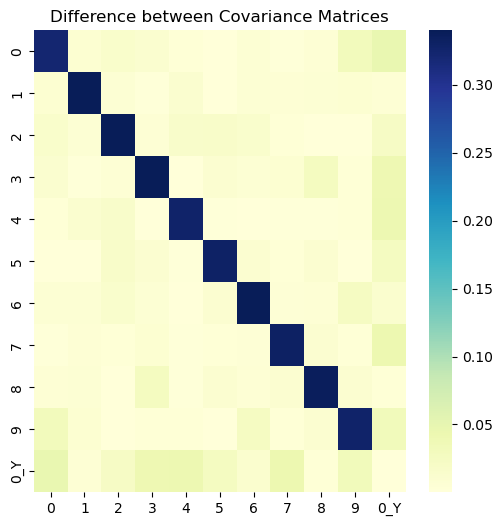

In [30]:
from matplotlib import axis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_df = pd.DataFrame(X).join(pd.DataFrame(y), how="inner", rsuffix='_Y')
knockoff_X_df = pd.DataFrame(knockoff_X).join(pd.DataFrame(y), how="inner", rsuffix='_Y')

# Calculate the covariance matrices
cov_X = X_df.cov()
cov_knockoff_X = knockoff_X_df.cov()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the covariance matrices as heatmaps
sns.heatmap(cov_X, annot=False, cmap="YlGnBu", ax=ax1, robust=True)
ax1.set_title("Covariance Matrix of X_df")

sns.heatmap(cov_knockoff_X, annot=False, cmap="YlGnBu", ax=ax2, robust=True)
ax2.set_title("Covariance Matrix of knockoff_X_df")

plt.tight_layout()
plt.show()

# Calculate the difference between the covariance matrices
cov_diff = np.abs(cov_X - cov_knockoff_X)

# Plot the difference as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cov_diff, annot=False, cmap="YlGnBu", robust=True)
plt.title("Difference between Covariance Matrices")
plt.show()